In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

# Preprocessing Data

In [3]:
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "train"
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 180,
    shear_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest'
)

VALIDATION_DIR = "valid"
validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 180,
    shear_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest'
)

In [4]:
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(256,256),
    class_mode='categorical',
    batch_size=32,
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(256,256),
    class_mode='categorical',
    batch_size=32,
    shuffle=True
)

Found 2100 images belonging to 3 classes.
Found 702 images belonging to 3 classes.


# Create Modelling

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [6]:
model = Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()

C:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,490,147 (24.76 MB)

 Trainable params: 6,490,147 (24.76 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from tensorflow.keras import optimizers

# Create the optimizer with the desired learning rate
opt = optimizers.Adam(learning_rate=0.001)

model.compile(loss = 'categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [8]:
history = model.fit(
    train_generator, 
    epochs = 20,
    validation_data = validation_generator, 
    verbose = 1)
model.save("adam-20-model.h5")

Epoch 1/20


C:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


66/66 ━━━━━━━━━━━━━━━━━━━━ 59s 822ms/step - accuracy: 0.5194 - loss: 0.9532 - val_accuracy: 0.5855 - val_loss: 1.5199
Epoch 2/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 57s 829ms/step - accuracy: 0.8755 - loss: 0.3268 - val_accuracy: 0.4687 - val_loss: 4.5718
Epoch 3/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 58s 845ms/step - accuracy: 0.9171 - loss: 0.2021 - val_accuracy: 0.6610 - val_loss: 1.1007
Epoch 4/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 59s 855ms/step - accuracy: 0.9444 - loss: 0.1590 - val_accuracy: 0.5442 - val_loss: 2.1986
Epoch 5/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 60s 869ms/step - accuracy: 0.9604 - loss: 0.1233 - val_accuracy: 0.4701 - val_loss: 4.0671
Epoch 6/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 58s 840ms/step - accuracy: 0.9577 - loss: 0.1253 - val_accuracy: 0.6980 - val_loss: 2.0593
Epoch 7/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 57s 827ms/step - accuracy: 0.9840 - loss: 0.0611 - val_accuracy: 0.5912 - val_loss: 3.9403
Epoch 8/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 57s 824ms/step - accuracy: 0.9782 - loss: 0.0682 - val_accuracy: 0.622

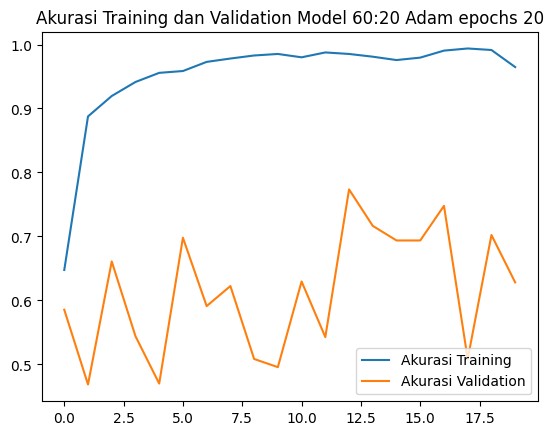

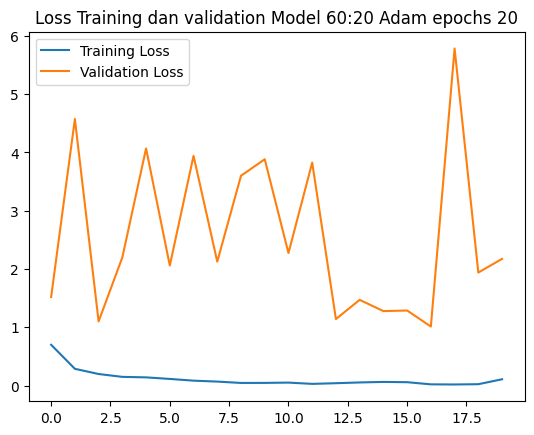

<Figure size 640x480 with 0 Axes>

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Akurasi Training')
plt.plot(epochs, val_acc, label='Akurasi Validation')
plt.title('Akurasi Training dan Validation Model 60:20 Adam epochs 20')
plt.legend(loc=0)
plt.savefig('C:/Coding/pengujian/60-20-20/results/Hasil akurasi model Adam 60-20 epochs 20.jpg')
plt.figure()

plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Loss Training dan validation Model 60:20 Adam epochs 20')
plt.legend(loc=0)
plt.savefig('C:/Coding/pengujian/60-20-20/results/Hasil loss model Adam 60-20 epochs 20.jpg')
plt.figure()

plt.show()

# Testing Model

In [10]:
from tensorflow import keras
model = keras.models.load_model('C:/Coding/pengujian/60-20-20/adam-20-model.h5')

In [11]:
import math

TEST_DIR = "test"
test_datagen = ImageDataGenerator(
    rescale = 1.0/255
)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(256,256),
    batch_size=32,
    shuffle=False,
    class_mode='categorical')

test_steps_per_epoch = math.ceil(test_generator.samples / test_generator.batch_size)

Found 702 images belonging to 3 classes.


In [12]:
predictions = model.predict(test_generator, steps=test_steps_per_epoch)

predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
y_pred = [np.argmax(probas) for probas in predictions]
y_test = test_generator.classes
class_names = test_generator.class_indices.keys()

C:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step


In [13]:
import os
from os import listdir
import pandas as pd

sehat = os.listdir("C:/Coding/pengujian/60-20-20/test/healthy")
septoria = os.listdir("C:/Coding/pengujian/60-20-20/test/septoria")
stripe_rust = os.listdir("C:/Coding/pengujian/60-20-20/test/stripe_rust")

data = sehat + septoria + stripe_rust

df = pd.DataFrame()
df['Nama File']=data
df['true_classes']=true_classes
df['Predicted_classes']=predicted_classes
df.to_csv('C:/Coding/pengujian/60-20-20/results/Hasil pengujian model Adam-20.csv')

# Find Confusion Matrix

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

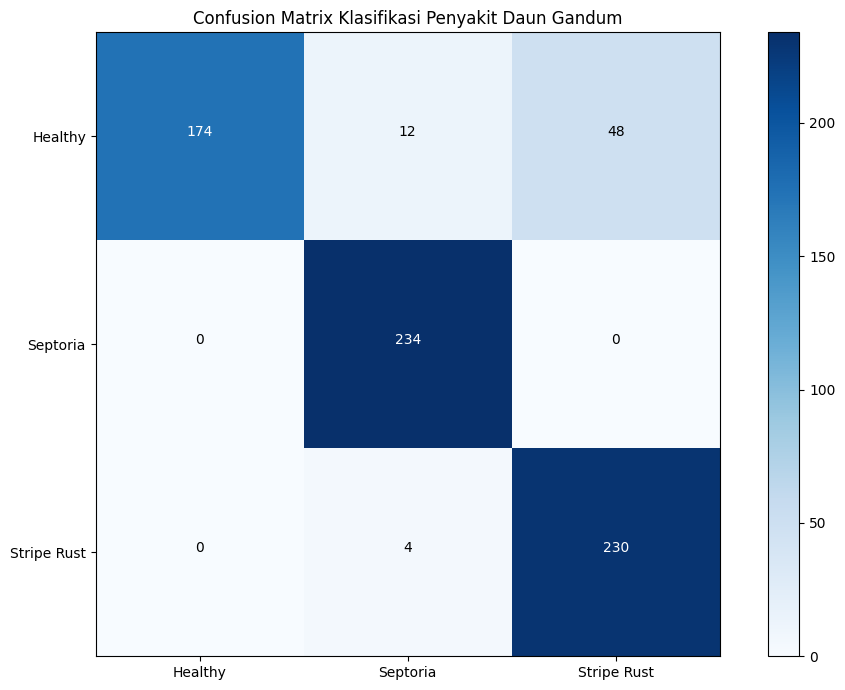

In [14]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
  plt.figure(figsize=(10,7))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, ['Healthy', 'Septoria', 'Stripe Rust'])
  plt.yticks(tick_marks, ['Healthy', 'Septoria', 'Stripe Rust'])
  #fmt = '.2f'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j]), horizontalalignment= "center", color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()

plt.savefig('C:/Coding/pengujian/60-20-20/results/Confusion Matrix Model Adam 60-20 epochs 20.jpg')
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion Matrix Klasifikasi Penyakit Daun Gandum')

# Find Performances Metrices

In [15]:
from sklearn import metrics
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
target_names = ['Healthy', 'Septoria', 'Stripe Rust']
report = metrics.classification_report(true_classes, predicted_classes, target_names=target_names)
print(report)

              precision    recall  f1-score   support

     Healthy       1.00      0.74      0.85       234
    Septoria       0.94      1.00      0.97       234
 Stripe Rust       0.83      0.98      0.90       234

    accuracy                           0.91       702
   macro avg       0.92      0.91      0.91       702
weighted avg       0.92      0.91      0.91       702

